<a href="https://colab.research.google.com/github/Murad042/00_tensorflow_fundamentals/blob/main/01_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What we are going to cover:

* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model( features and labels)
* Creating custom data to view and fit 
* Steps in modelling
    * Creating a model, compiling a model, fitting a model, evaluating the model
* Different evaluation models
* Saving and loading the models


> Regression inputs and outputs

>Anatomy of neural networks

Here are the ten steps to improve your problem solving skills and to solve the programming problem in Python:

* Read the problem at least three times
* Work through the problem manually
* Simplify and optimize your steps
* Write pseudocode
* Translate pseudocode into code and debug
* Simplify and optimize your code
* Debug
* Write useful comments
* Get feedback through code reviews
* Practice, practice, practice

## Introduction to Regression with Neural Network in Tensorflow

There are many definitions for a regression problem ,but in our , we are going to simplify it: predicting a numerical variabel based on some other combination of variables, even shorter... predicting a number
 

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


# Creating data to view and fit

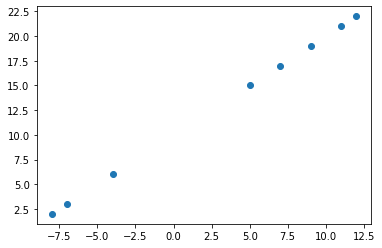

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-8.0,9.0,7.0,5.0,11.0,12.0])

# Create labels
y = np.array([3.0,6.0,2.0,19.0,17.0,15.0,21.0,22.0])


#Visualize
plt.scatter(X,y)

#Input and putput shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
X[0],y[0]

(-7.0, 3.0)

In [5]:
X[1],y[1]

(-4.0, 6.0)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

((), ())

In [8]:
##Because of
X[0].ndim


0

In [9]:
X.shape,X.ndim

((8,), 1)

In [10]:
house_info.shape,house_info.ndim

(TensorShape([3]), 1)

In [11]:
# Turn our numpy arrays to tensors
X = tf.constant(tf.cast(X,dtype=tf.float32))
y = tf.constant(tf.cast(y,dtype=tf.float32))
X,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -8.,  9.,  7.,  5., 11., 12.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  2., 19., 17., 15., 21., 22.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

# Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words , the function which tell our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can  use to interpret the performance of our mode).
3. **Fitting a model**  - letting the model try to find the patterns between X & y(features and labels).

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using a Sequential API
model = tf.keras.Sequential([
 tf.keras.layers.Dense(1)                         
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3.Fit the model
model.fit(X,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 428ms/step - loss: 11.3436 - mae: 11.3436
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2359 - mae: 11.2359
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1283 - mae: 11.1283
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.0206 - mae: 11.0206
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9129 - mae: 10.9129


In [14]:
#Check out X and y
X,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -8.,  9.,  7.,  5., 11., 12.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  2., 19., 17., 15., 21., 22.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.397268]], dtype=float32)

# Improving our model

# We can improve our model, by altering the steps we took to create a model

1. **Create a model** - here we might add more layers, increase the number of hidden units( also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer)  or on more data (give the model more examples to learn from).

In [16]:
# Let's rebuild our model

#Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# Fit the model ( this time we ll train for longer)
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 232ms/step - loss: 11.0910 - mae: 11.0910
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9834 - mae: 10.9834
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8757 - mae: 10.8757
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7680 - mae: 10.7680
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6604 - mae: 10.6604
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5527 - mae: 10.5527
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4451 - mae: 10.4451
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3374 - mae: 10.3374
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2298 - mae: 10.2298
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1221 - mae: 10.1221
Epoch 11/100
1/1 [==============================] - 0s 5

In [17]:
model.predict([19.0])

array([[35.62414]], dtype=float32)

In [18]:
# Let's see if we can make another change to improve our model


# Create a model (this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
 tf.keras.layers.Dense(50,activation = None),
 tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])

# Fit the model
model.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 11.5788 - mae: 11.5788
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9691 - mae: 10.9691
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3508 - mae: 10.3508
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 9.7211 - mae: 9.7211
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0755 - mae: 9.0755
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4100 - mae: 8.4100
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.7210 - mae: 7.7210
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0057 - mae: 7.0057
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0152 - mae: 7.0152
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4622 - mae: 7.4622
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

In [19]:
model.predict([17.0])

array([[26.228556]], dtype=float32)

# Learning rate is the most important hyper parameter of many different neural networks.

# Evaluatin the model

In Practice, a typical workflow you ll go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->
-> tweak a model -> fit the model -> evaluate it....
```

When it comes to evaluation, there are 3 words you should memorize:

> "visualize, visualize, visualize"

it is good idea to visualize:
* The data - what data we are working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - How does model perform while it learns?
* The prediction of the model - How do the predictions of model line up
against the ground truth?(the original label)

In [20]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
X.shape,X.ndim

(TensorShape([50]), 1)

In [22]:
tf.size(X)

<tf.Tensor: shape=(), dtype=int32, numpy=50>

In [23]:
# Make labels for the  dataset
y = X + 10
y


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

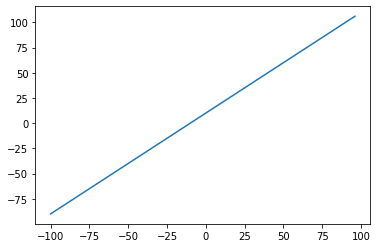

In [24]:
# Visualize the data
import matplotlib.pyplot as plt

plt.plot(X,y)

# The 3 sets

* **Training set** - the model learn from this data, which is typically 70-80% of total dataset you have available.
* **Validation set** - the model gets tuned on this dataset, which is 10-15% of data available.
* **Test set** - the model gets evaluated on this data to test what is has learned? this data typically is 10-15% of data availabale.
> Generalization - the ability of a machine learning model to perform well on the data it hasn't seen before.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [27]:
X_test = X[40:]
y_test = y[40:]
X_test,y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

# Visualizing the data
 We have got our data in training set and test set... let's visualize it again!!!

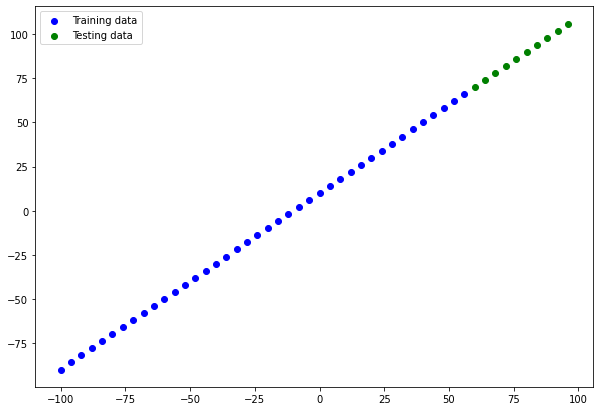

In [28]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train, c="b",label="Training data")
#Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")
#Show a legend
plt.legend();

In [29]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model= tf.keras.Sequential([
 tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.Fit the model
#model.fit(X_train,y_train)


#Visualizing the model

In [30]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Let's create a model which builds automatically by defining the input shape argument in the first layer

In [31]:
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
 tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
 tf.keras.layers.Dense(1,name="output_layer")
], name="our_first_model")


# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train,y_train,epochs=100,verbose=0)



In [32]:
model.summary()


Model: "our_first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of paramaters in the model.
* Trainable params - these are parameters (patterns) the model can update as it trains.(weights and biases)
* Non-trainable params - these parameters aren't updated during the training.(this is typical when you bring in already learned patterns or parameters from other models during the **transfer learning**)

 if you want to have a look at what the actual parameters are in a dense layer, you're going to probably find something called a weights matrix and a bias vector.

In [33]:
# Let's fit our model to the training data
model.fit(X_train,y_train,epochs=100,verbose=0)

> how can we calculate the number of these parameters within each layer or within the entire network ?
* to find this result esentially we just count the number of parameters within each layer and then sum them up to get the total number of parameters within the full network

* what we need in order to calculate the number of parameters within an
individual layer is the number of inputs to that layer the number of outputs from that layer and whether or not the layer contains biases 

* inputs(nodes multiply by layer)x otputs(nodes nultiply by layer) == weights

* then we just need to understand whether or not the layer contains biases for each node

* if it does then we simply add to the weights we just calculated we just calculated the number of biases

*  the number of biases will also be equal to the number of nodes in that layer 

* there are bias terms within our hidden layer and our output layer

* first the input layer has no learnable parameters since the input layer is just made up of the input data and the output from the layer is actually just going to be considered as input to the next layer

In [34]:
# Get a summary of our model
model.summary()


Model: "our_first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


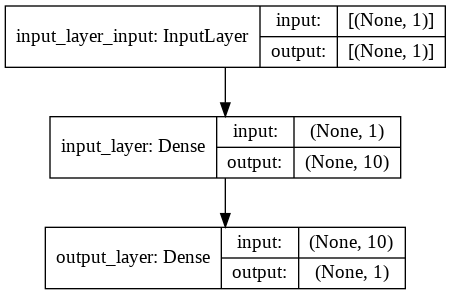

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True)

# Visualizing our model's predictions
To visualize predictions, it is good idea to plot them against the ground truth labels.
* Often you'll se this in the form of `y_true` or `y_test` versus y_pred(ground truth versus your model's prediction).

In [36]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred,X_test

(array([[ 89.459785],
        [ 95.19732 ],
        [100.934845],
        [106.67238 ],
        [112.40991 ],
        [118.14745 ],
        [123.88497 ],
        [129.62251 ],
        [135.36005 ],
        [141.09758 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>)

In [37]:
y_test#ground truth labels

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
# :Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labeles
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_label,c="b",label="Training data")
  #Plot testing data in green
  plt.scatter(test_data,test_label,c="g",label="Test data")
  #Plot model's predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  #show the legend
  plt.legend();

  


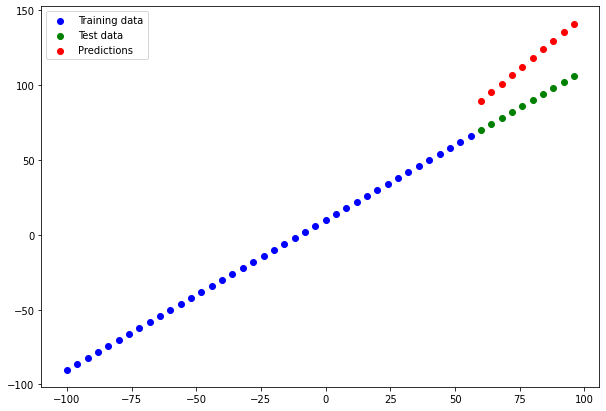

In [39]:
plot_predictions()

# Evaluating our model's predictions using regression evaluation metrics

* Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's predictions.

> Since we are working on a regression problem: two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions."
* MSE - mean square error, "square the average errors"



In [40]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 110ms/step - loss: 27.2787 - mae: 27.2787


[27.2786808013916, 27.2786808013916]

In [41]:
y_pred

array([[ 89.459785],
       [ 95.19732 ],
       [100.934845],
       [106.67238 ],
       [112.40991 ],
       [118.14745 ],
       [123.88497 ],
       [129.62251 ],
       [135.36005 ],
       [141.09758 ]], dtype=float32)

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=27.27868>

In [44]:
result=tf.constant(tf.squeeze(tf.cast(y_pred,dtype=tf.float32)))-tf.cast(y_test,dtype=tf.float32)

In [45]:
a=0
result=abs(tf.constant(tf.squeeze(tf.cast(y_pred,dtype=tf.float32)))-tf.cast(y_test,dtype=tf.float32).numpy())
for i in result:
  a=a+i
print(tf.cast(a,dtype=tf.int32)/tf.size(result))


tf.Tensor(27.2, shape=(), dtype=float64)


In [46]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=769.0333>

In [47]:
square_results=tf.square(tf.constant(tf.squeeze(tf.cast(y_pred,dtype=tf.float32)))-tf.cast(y_test,dtype=tf.float32))
square_results

b= 0
for i in square_results:
  b=b+i
print(tf.cast(b,dtype=tf.int32)/tf.size(square_results))


tf.Tensor(769.0, shape=(), dtype=float64)


### Running experiments to improve our model
1. Get more data - get more examples for your model to train on(more opportunities to learn pattern or relationships between features and labels).
2. Make your model larger ( using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model,1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.




In [48]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [49]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
 tf.keras.layers.Dense(1)
])

#2 Compile a model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3 Fit the model
model_1.fit(X_train, y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - 

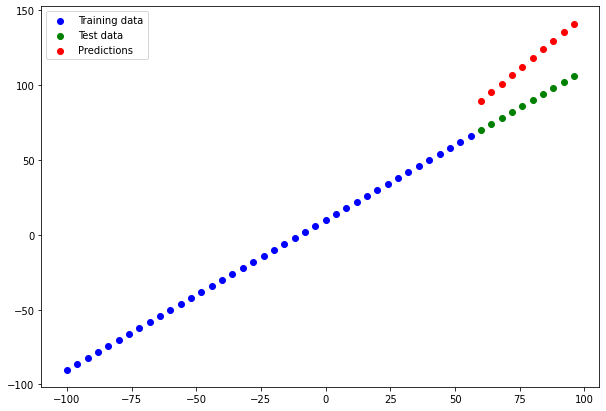

In [50]:
# Make and plot the predictions for model_1
y_preds_1=model.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
mae_1 = tf.keras.losses.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_preds_1))
mse_1 = tf.keras.losses.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_preds_1))



In [52]:
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=27.27868>,
 <tf.Tensor: shape=(), dtype=float32, numpy=769.0333>)

In [53]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 89.459785],
        [ 95.19732 ],
        [100.934845],
        [106.67238 ],
        [112.40991 ],
        [118.14745 ],
        [123.88497 ],
        [129.62251 ],
        [135.36005 ],
        [141.09758 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 89.459785,  95.19732 , 100.934845, 106.67238 , 112.40991 ,
        118.14745 , 123.88497 , 129.62251 , 135.36005 , 141.09758 ],
       dtype=float32)>)

**Build** `model_2`

In [54]:
# Set the random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

#Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(X_train,y_train,epochs=100)



Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

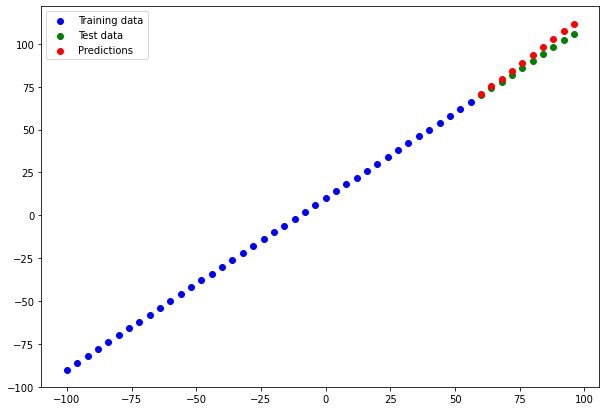

In [55]:
# Make and plot prediction of model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [56]:
mae_2 = tf.keras.losses.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_preds_2))
mse_2 = tf.keras.losses.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_preds_2))

In [57]:
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [58]:
# Build model 3
# Set the random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

#Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(X_train,y_train,epochs=500)




Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/500
2/2 [==========================

In [59]:
y_preds_3 = model.predict(X_test)
y_preds_3

array([[ 89.459785],
       [ 95.19732 ],
       [100.934845],
       [106.67238 ],
       [112.40991 ],
       [118.14745 ],
       [123.88497 ],
       [129.62251 ],
       [135.36005 ],
       [141.09758 ]], dtype=float32)

In [60]:
mae_3 = tf.keras.losses.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_preds_3))
mse_3 = tf.keras.losses.mean_squared_error(y_true=y_test,y_pred=y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=27.27868>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 134.13098,  183.80139,  299.31024,  480.65778,  727.84375,
        1040.8689 , 1419.7312 , 1864.4336 , 2374.9739 , 2951.353  ],
       dtype=float32)>)

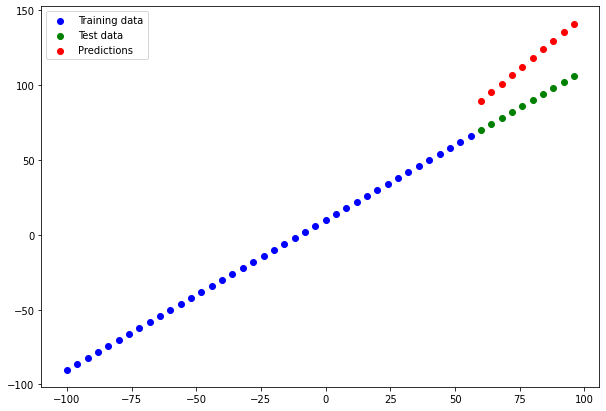

In [61]:
plot_predictions(predictions=y_preds_3)

In [62]:
#Lets compare our model results using Pandas DataFrames
import pandas as pd
model_results= [["model_1",mae_1.numpy(),mse_1.numpy()],
                ["model_2",mae_2.numpy(),mse_2.numpy()],
                ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results


,model,mae,mse
0,model_1,27.278681,769.033
1,model_2,3.196941,13.0701
2,model_3,27.278681,"[134.13098, 183.80139, 299.31024, 480.65778, 7..."


In [63]:
model.summary()



Model: "our_first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


###Tracking your experiment
One really good habit in machine learning is to track  the results of your experiments

And when doing so, it can be tedios if you are running lots of experiments.

Luckily,there are tools to help us

**Resource** - As you build more models, you'll want to look into using:
* TensorBoard - a componet of tensorflow library to help track modelling experiments (we'll see this later on)
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).


## Saving our models
Saving our models allows us to use them outside of Googlecolab  (or whatever they were trained) such as a web application or a mobile app.
> There are two main formats to save our models:
1. The SavedModel Format:
2. The HDF5 Format:

In [64]:
# Save model using SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [65]:
# Save the model using HDF5 format
model_2.save('model_2.h5')

In [66]:
# Load in a saved model
saved_model_savedmodel = tf.keras.models.load_model("/content/best_model_SavedModel_format")

In [67]:
saved_model_savedmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compare saved_model_savedmodel format predictions with model_2 prediction
model_2_preds =tf.constant(model_2.predict(X_test))
saved_model_savedmodel_preds = tf.constant(saved_model_savedmodel.predict(X_test))

model_2_preds,saved_model_savedmodel_preds

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[15.854742],
        [16.617329],
        [17.379915],
        [18.142504],
        [18.905092],
        [19.667677],
        [20.430264],
        [21.192854],
        [21.95544 ],
        [22.718027]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[15.854742],
        [16.617329],
        [17.379915],
        [18.142504],
        [18.905092],
        [19.667677],
        [20.430264],
        [21.192854],
        [21.95544 ],
        [22.718027]], dtype=float32)>)

In [70]:
model_2_preds == saved_model_savedmodel_preds

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [71]:
def mae(y_test=y_test,y_pred=y_pred):
  return tf.keras.losses.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
def mse(y_test=y_test,y_pred=y_pred):
  return tf.keras.losses.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))

In [72]:
mae(y_test=y_test,y_pred=model_2_preds)==mae(y_test=y_test,y_pred=saved_model_savedmodel_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [73]:
# Load in a model using a HDF5 format
load_h5_model = tf.keras.models.load_model("/content/model_2.h5")
load_h5_model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Compare the h5 format loaded model with model_2
load_h5_model_preds = load_h5_model.predict(X_test)
model_2_preds==load_h5_model_preds

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

# Download a model ( or any file ) from Google Colab
two ways to download files from google colab:

1. go to the file and right click choose the download
2. code 
3. Saving to google drive by copying it there

In [76]:
from google.colab import files
files.download("/content/model_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
#  Save a file from google colab to the google drive
!cp /content/model.png /content/drive/MyDrive/books

In [78]:
!ls /content/drive/MyDrive/books

model.png


### A Larger example

In [79]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [80]:
#Let's try one-hote encode our dataframe
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [81]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]
X,y

(      age     bmi  ...  region_southeast  region_southwest
 0      19  27.900  ...                 0                 1
 1      18  33.770  ...                 1                 0
 2      28  33.000  ...                 1                 0
 3      33  22.705  ...                 0                 0
 4      32  28.880  ...                 0                 0
 ...   ...     ...  ...               ...               ...
 1333   50  30.970  ...                 0                 0
 1334   18  31.920  ...                 0                 0
 1335   18  36.850  ...                 1                 0
 1336   21  25.800  ...                 0                 1
 1337   61  29.070  ...                 0                 0
 
 [1338 rows x 11 columns], 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Lengt

In [82]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [83]:
# Build a neural network(sort of like model_2)
tf.random.set_seed(42)

# Create a model
insurance_model = tf.keras.Sequential([
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 931us/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 972us/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 947us/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 983us/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7

In [84]:
# Check the results of insurance model on the test data
insurance_model.evaluate(X_test,y_test)


9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [85]:
y_train.median(),y_train.mean()


(9575.4421, 13346.089736364489)

Right now it looks like  our model isn't performing too well... let's try and improve it

In [86]:
#Set random seed
tf.random.set_seed(42)

# Create a model
insurance_model_2=tf.keras.Sequential([
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model\
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [87]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [88]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [89]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
insurance_model_3 = tf.keras.Sequential([
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# Fit the model
history =  insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [90]:
# Evaluate the model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

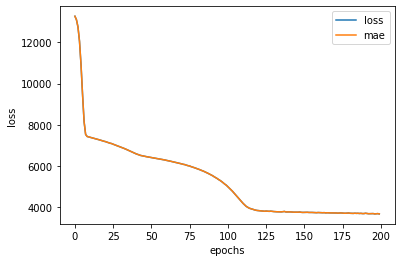

In [91]:
# Plot history (also loss curve and training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **Question:** How long should you train for?

it depends on:
Problem you are working on....However many people have asked this question before..so Tensorflow has a solution!!! it is called the[ ** EarlyStopping Callback**]( https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping),whic is a Tensorflow component you can add to your model to stop training once it stops improving a certain metrics.

# Preprocessing the data ( normalization and standardization)


In [92]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


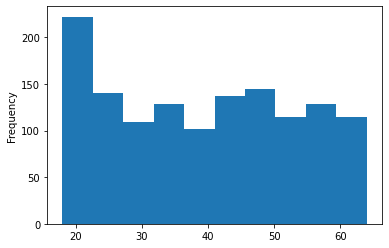

In [93]:
X["age"].plot(kind="hist")

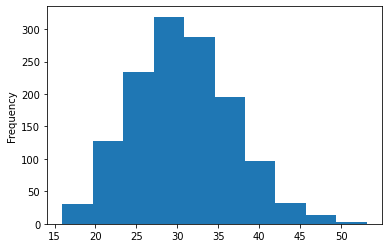

In [94]:
X["bmi"].plot(kind="hist")

In [95]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# In terms of scaling, neural networks tend to prefer normalization

> If you are not sure on which to use, you could try use both and see which performs better


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# Read in the insurance DataFrame
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#To prepare our data, we can a borrow a few classes from Scikit-Learn

In [97]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct =  make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #turn all values in these columns  between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create  X and y value
X = insurance.drop("charges",axis =1)
y = insurance["charges"]

# Build our train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42 )

# Fit the column transformer to our training data
ct.fit(X_train)

# Transfrom the training  and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [101]:
#What does our data look like?
X_train.loc[0]


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [103]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [104]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [108]:
# build a neural network
tf.random.set_seed(42)

#Create the model
insurance_model_4 = tf.keras.Sequential([
 tf.keras.layers.Dense(100),
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# Fit the model
insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [106]:
insurance_model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Evaluate the model
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]